In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Hospital.csv')
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)

F1 scores of all the models

In [37]:
data["Image"] = data['LLM'].apply(lambda x: True if 'ImageInput' in x else False)
df = data.copy()
df.head(66)

,LLM,False Positives,False Negatives,Incorrect Extractions,Correct Matches,Precision,Recall,F1score,Accuracy,Source,Hospital,Prompt,Image
0,GLiNER:NuNerZero,7,12,10,42.0,71.186441,77.777778,74.336283,59.154930,huggingface,hospital1,Normal,False
1,NuExtract:2B,8,7,13,43.0,67.187500,86.000000,75.438596,60.563380,huggingface,hospital1,NaN,False
2,GLiNER:NuNerZero,7,8,12,44.0,69.841270,84.615385,76.521739,61.971831,huggingface,hospital1,Normal,False
3,NuExtract:2B,1,14,11,45.0,78.947368,76.271186,77.586207,63.380282,huggingface,hospital2,NaN,False
4,GLiNER:NuNerZero,1,18,10,42.0,79.245283,70.000000,74.336283,59.154930,huggingface,hospital2,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,gpt-4.1-nano*ImageInput*,0,16,27,28.0,50.909091,63.636364,56.565657,39.436620,openai_vision,hospital2,Normal,True
62,gpt-4.1-nano*ImageInput*,1,15,0,55.0,98.214286,78.571429,87.301587,77.464789,openai_vision,hospital1,LTNER/GPT-NER,True
63,gpt-4.1*ImageInput*,1,15,0,55.0,98.214286,78.571429,87.301587,77.464789,openai_vision,hospital1,LTNER/GPT-NER,True
64,gpt-4.1-mini*ImageInput*,1,15,0,55.0,98.214286,78.571429,87.301587,77.464789,openai_vision,hospital1,LTNER/GPT-NER,True


<Axes: xlabel='LLM'>

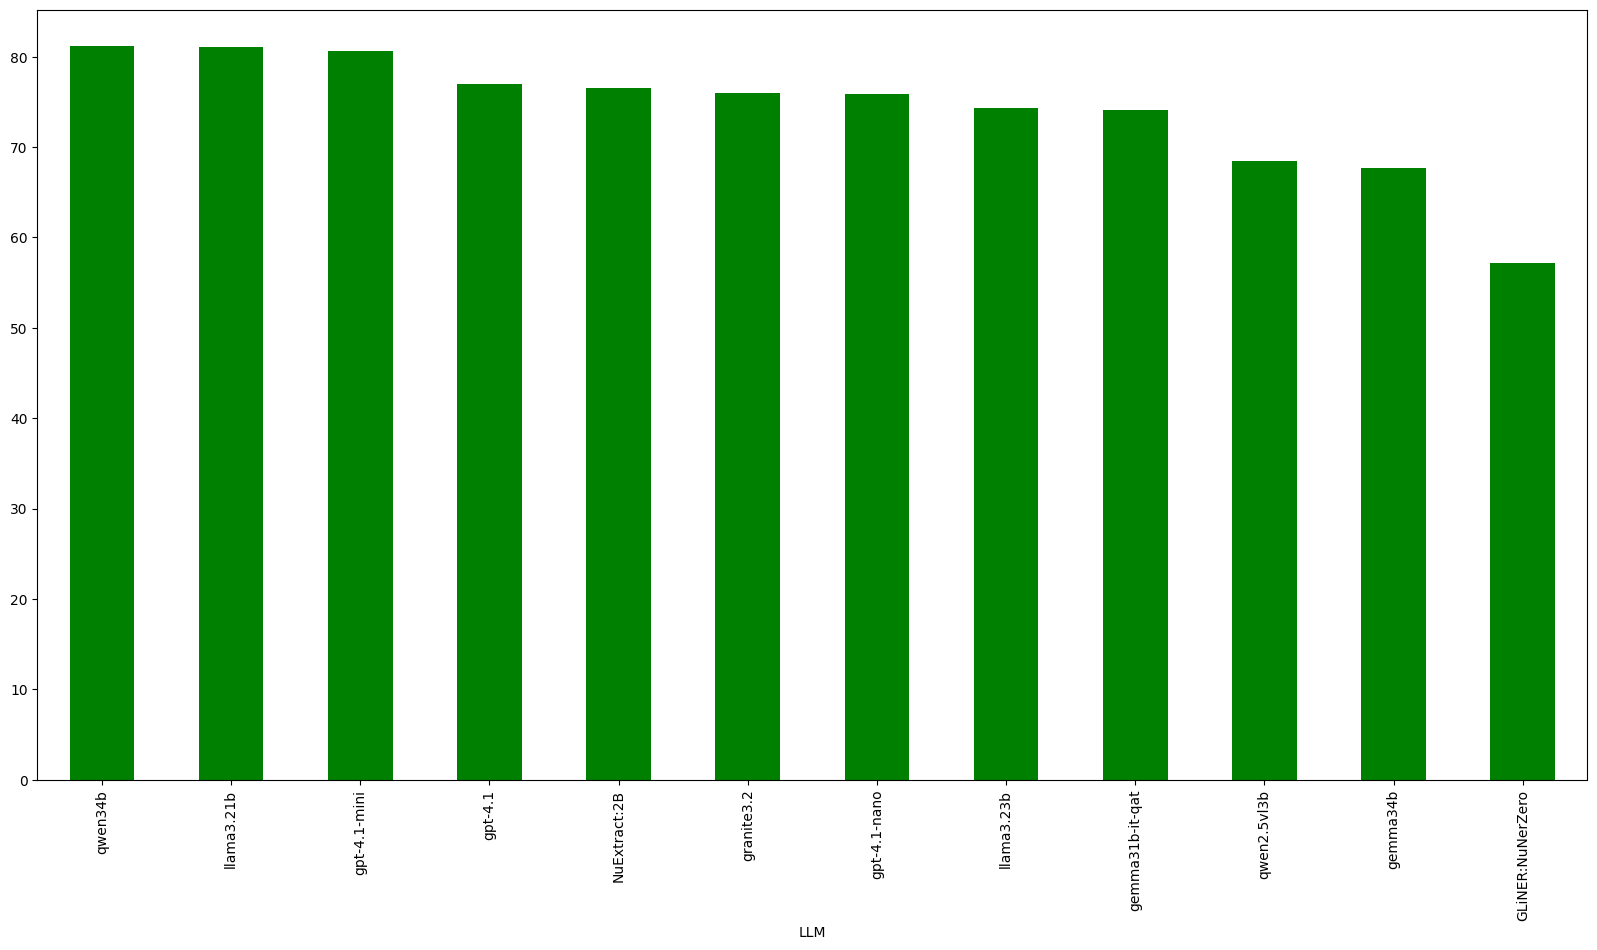

In [43]:
df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', ""))
d = df.groupby('LLM').F1score.mean().sort_values(ascending=False)
d.plot(kind='bar', figsize=(20, 10), x='LLM', y='F1score', color='green')

Compare the f1 scores of all the models from highest to lowest  

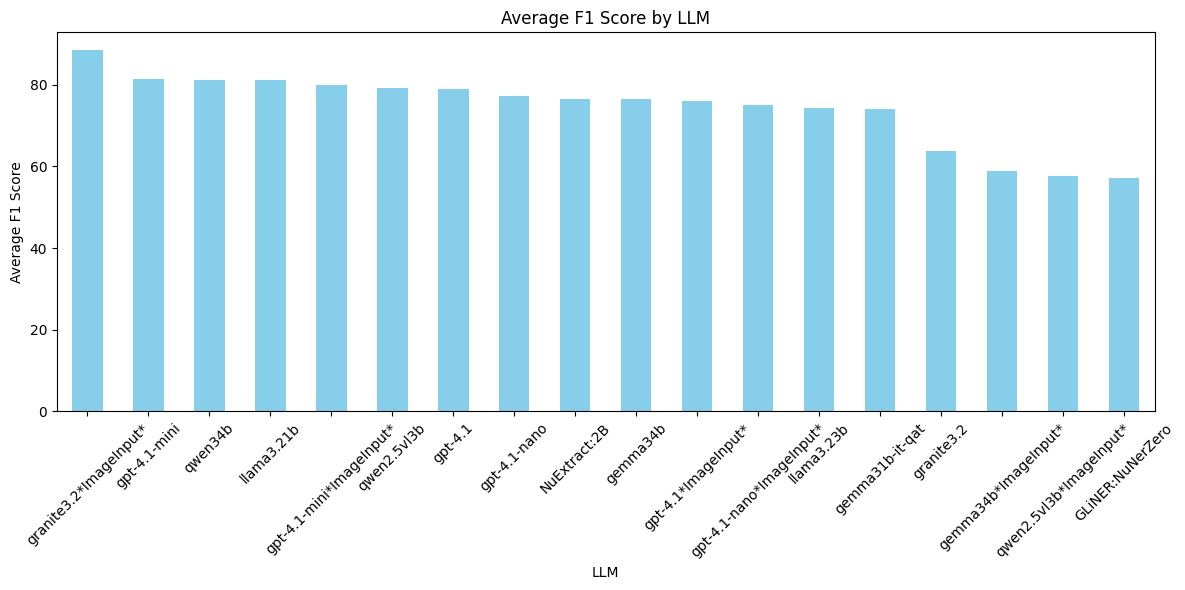

In [18]:
df = data.groupby(['LLM']).F1score.mean().sort_values(ascending=False)
df.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average F1 Score by LLM')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()

Compare using the LTNER few-shot prompt or the normal prompt across all models

In [ ]:
data.head()
df = data.groupby(['Prompt']).F1score.mean().sort_values(ascending=False)
df.head(20)

Prompt
LTNER/GPT-NER    78.850924
Normal           72.220778
Name: F1score, dtype: float64

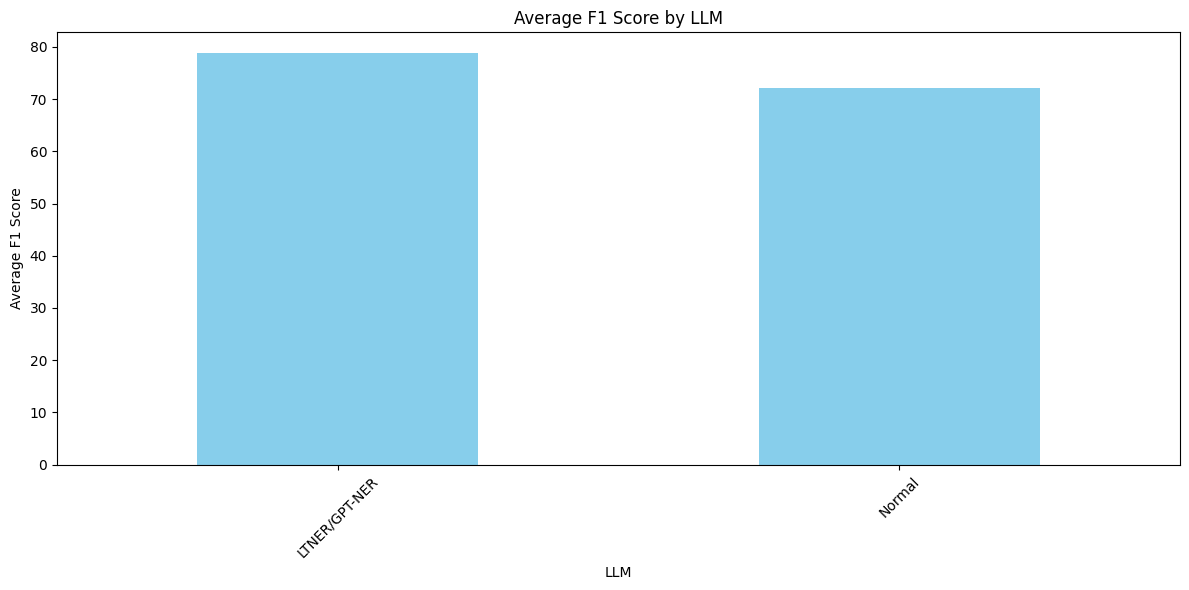

In [16]:
df.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average F1 Score by LLM')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()